In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [2]:
### Importing the dataset:

df = pd.read_csv("financial_risk_analysis_large.csv")
df

,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,EmploymentStatus,MaritalStatus,NumberOfDependents,EducationLevel,HomeOwnershipStatus,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
0,402,63295,18830,13,29,Self-Employed,Widowed,2,Doctorate,Other,...,24,378,3741,40058,977,412,399,136,124,0
1,735,55936,23729,1,42,Self-Employed,Divorced,3,Master,Own,...,10,575,4115,16745,695,206,898,252,131,0
2,570,62547,19660,7,54,Self-Employed,Single,3,Doctorate,Mortgage,...,16,691,4105,23273,627,266,392,73,36,0
3,406,46129,21674,23,25,Self-Employed,Divorced,3,High School,Other,...,6,452,4559,42163,397,307,250,378,-32,0
4,371,57725,12189,26,42,Employed,Widowed,4,Master,Own,...,2,690,7856,30087,723,315,114,88,68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,414,83679,19053,10,54,Unemployed,Married,2,Bachelor,Other,...,33,523,5740,31540,890,351,599,148,138,0
999996,333,79096,22567,4,21,Self-Employed,Married,2,Bachelor,Rent,...,35,525,5669,26843,2082,80,427,366,100,0
999997,668,55138,13939,28,52,Employed,Divorced,0,Bachelor,Rent,...,20,386,3475,27936,393,-85,534,8,98,0
999998,627,62867,19115,8,23,Employed,Married,4,Associate,Mortgage,...,18,287,6476,17752,1226,311,227,119,167,0


In [3]:
df.shape

(1000000, 51)

In [4]:
df.columns

Index(['CreditScore', 'AnnualIncome', 'LoanAmount', 'LoanDuration', 'Age',
       'EmploymentStatus', 'MaritalStatus', 'NumberOfDependents',
       'EducationLevel', 'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'InterestRate', 'PaymentHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance',
       'InvestmentAccountBalance', 'RetirementAccountBalance',
       'EmergencyFundBalance', 'TotalAssets', 'TotalLiabilities', 'NetWorth',
       'LengthOfCreditHistory', 'MortgageBalance', 'RentPayments',
       'AutoLoanBalance', 'PersonalLoanBalance', 'StudentLoanBalance',
       'UtilityBillsPaymentHistory', 'HealthInsuranceStatus',
       'LifeInsuranceStatus', 'CarInsuranceStatus', 'HomeInsuranceStatus',
       'OtherInsurancePolicies', 'EmployerType', 'JobTenure', 'MonthlySavings',
       'AnnualB

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 51 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   CreditScore                 1000000 non-null  int64  
 1   AnnualIncome                1000000 non-null  int64  
 2   LoanAmount                  1000000 non-null  int64  
 3   LoanDuration                1000000 non-null  int64  
 4   Age                         1000000 non-null  int64  
 5   EmploymentStatus            1000000 non-null  str    
 6   MaritalStatus               1000000 non-null  str    
 7   NumberOfDependents          1000000 non-null  int64  
 8   EducationLevel              1000000 non-null  str    
 9   HomeOwnershipStatus         1000000 non-null  str    
 10  MonthlyDebtPayments         1000000 non-null  int64  
 11  CreditCardUtilizationRate   1000000 non-null  float64
 12  NumberOfOpenCreditLines     1000000 non-null  int64  
 13  NumberOfC

In [6]:
df.dtypes

CreditScore                     int64
AnnualIncome                    int64
LoanAmount                      int64
LoanDuration                    int64
Age                             int64
EmploymentStatus                  str
MaritalStatus                     str
NumberOfDependents              int64
EducationLevel                    str
HomeOwnershipStatus               str
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                       str
PreviousLoanDefaults            int64
InterestRate                  float64
PaymentHistory                  int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
InvestmentAccountBalance        int64
RetirementAccountBalance        int64
EmergencyFundBalance            int64
TotalAssets                     int64
TotalLiabili

In [7]:
### converting the features with string datatype to object datatype:

### list of columns with string datatype:

st = df.select_dtypes("string").columns
st

Index(['EmploymentStatus', 'MaritalStatus', 'EducationLevel',
       'HomeOwnershipStatus', 'LoanPurpose', 'HealthInsuranceStatus',
       'LifeInsuranceStatus', 'CarInsuranceStatus', 'HomeInsuranceStatus',
       'EmployerType'],
      dtype='str')

In [8]:
df[st] = df[st].astype("object")

In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 51 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   CreditScore                 1000000 non-null  int64  
 1   AnnualIncome                1000000 non-null  int64  
 2   LoanAmount                  1000000 non-null  int64  
 3   LoanDuration                1000000 non-null  int64  
 4   Age                         1000000 non-null  int64  
 5   EmploymentStatus            1000000 non-null  object 
 6   MaritalStatus               1000000 non-null  object 
 7   NumberOfDependents          1000000 non-null  int64  
 8   EducationLevel              1000000 non-null  object 
 9   HomeOwnershipStatus         1000000 non-null  object 
 10  MonthlyDebtPayments         1000000 non-null  int64  
 11  CreditCardUtilizationRate   1000000 non-null  float64
 12  NumberOfOpenCreditLines     1000000 non-null  int64  
 13  NumberOfC

In [10]:
### Statistical analysis:

df.describe(include = "all")

,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,EmploymentStatus,MaritalStatus,NumberOfDependents,EducationLevel,HomeOwnershipStatus,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000,1000000,1000000.000000,1000000,1000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
unique,NaN,NaN,NaN,NaN,NaN,3,4,NaN,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Unemployed,Married,NaN,Associate,Own,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,333719,250488,NaN,200684,250356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,574.559628,59971.227298,20001.643495,15.014402,43.497517,NaN,NaN,1.999334,NaN,NaN,...,19.500790,499.097705,4999.802337,29990.070722,999.821493,299.567663,399.724339,199.424883,99.458080,0.373169
std,158.774753,15013.989902,5000.662270,8.363599,15.005348,NaN,NaN,1.415219,NaN,NaN,...,11.541492,299.700808,1999.559754,9994.979331,400.084107,149.851337,199.959738,99.921983,49.931612,0.483647
min,300.000000,-9666.000000,-4900.000000,1.000000,18.000000,NaN,NaN,0.000000,NaN,NaN,...,0.000000,-937.000000,-3934.000000,-18396.000000,-1093.000000,-399.000000,-543.000000,-353.000000,-123.000000,0.000000
25%,437.000000,49855.000000,16630.000000,8.000000,30.000000,NaN,NaN,1.000000,NaN,NaN,...,10.000000,297.000000,3650.000000,23246.000000,730.000000,198.000000,265.000000,132.000000,66.000000,0.000000
50%,574.000000,59973.000000,20006.000000,15.000000,43.000000,NaN,NaN,2.000000,NaN,NaN,...,20.000000,499.000000,4999.000000,29998.000000,1000.000000,299.000000,400.000000,199.000000,99.000000,0.000000
75%,712.000000,70080.000000,23376.000000,22.000000,56.000000,NaN,NaN,3.000000,NaN,NaN,...,29.000000,701.000000,6348.000000,36736.000000,1270.000000,401.000000,535.000000,267.000000,133.000000,1.000000


In [11]:
### detection of missing values:

df.isnull().sum()

CreditScore                   0
AnnualIncome                  0
LoanAmount                    0
LoanDuration                  0
Age                           0
EmploymentStatus              0
MaritalStatus                 0
NumberOfDependents            0
EducationLevel                0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
InterestRate                  0
PaymentHistory                0
SavingsAccountBalance         0
CheckingAccountBalance        0
InvestmentAccountBalance      0
RetirementAccountBalance      0
EmergencyFundBalance          0
TotalAssets                   0
TotalLiabilities              0
NetWorth                      0
LengthOfCreditHistory         0
MortgageBalance               0
RentPayments                  0
AutoLoan

# EDA:

In [12]:
### Histogram for analyzing the distribution of CreditScore:

# sns.histplot(df["CreditScore"], kde=True, bins = 20)

In [13]:
df.head()

,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,EmploymentStatus,MaritalStatus,NumberOfDependents,EducationLevel,HomeOwnershipStatus,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
0,402,63295,18830,13,29,Self-Employed,Widowed,2,Doctorate,Other,...,24,378,3741,40058,977,412,399,136,124,0
1,735,55936,23729,1,42,Self-Employed,Divorced,3,Master,Own,...,10,575,4115,16745,695,206,898,252,131,0
2,570,62547,19660,7,54,Self-Employed,Single,3,Doctorate,Mortgage,...,16,691,4105,23273,627,266,392,73,36,0
3,406,46129,21674,23,25,Self-Employed,Divorced,3,High School,Other,...,6,452,4559,42163,397,307,250,378,-32,0
4,371,57725,12189,26,42,Employed,Widowed,4,Master,Own,...,2,690,7856,30087,723,315,114,88,68,0


In [14]:
### Histogram for analyzing the distribution of AnnualIncome:

# sns.histplot(df["AnnualIncome"], kde=True, bins = 20)

In [15]:
### Histogram for analyzing the distribution of LoanDuration:

# sns.histplot(df["LoanDuration"], kde=True, bins = 20)

In [16]:
### Histogram for analyzing the distribution of Age:

# sns.histplot(df["Age"], kde=True, bins = 15)

In [17]:
# df["EducationLevel"].value_counts().plot(kind="bar")

In [18]:
# df["HomeOwnershipStatus"].value_counts().plot(kind="bar")

In [19]:
# df["MaritalStatus"].value_counts().plot(kind="bar")

In [20]:
# df["LoanApproved"].value_counts().plot(kind="bar")

In [21]:
df.columns

Index(['CreditScore', 'AnnualIncome', 'LoanAmount', 'LoanDuration', 'Age',
       'EmploymentStatus', 'MaritalStatus', 'NumberOfDependents',
       'EducationLevel', 'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'InterestRate', 'PaymentHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance',
       'InvestmentAccountBalance', 'RetirementAccountBalance',
       'EmergencyFundBalance', 'TotalAssets', 'TotalLiabilities', 'NetWorth',
       'LengthOfCreditHistory', 'MortgageBalance', 'RentPayments',
       'AutoLoanBalance', 'PersonalLoanBalance', 'StudentLoanBalance',
       'UtilityBillsPaymentHistory', 'HealthInsuranceStatus',
       'LifeInsuranceStatus', 'CarInsuranceStatus', 'HomeInsuranceStatus',
       'OtherInsurancePolicies', 'EmployerType', 'JobTenure', 'MonthlySavings',
       'AnnualB

In [22]:
### Detection of outliers:

### list of numerical features:

num = df.select_dtypes("number").columns
num

Index(['CreditScore', 'AnnualIncome', 'LoanAmount', 'LoanDuration', 'Age',
       'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'InterestRate', 'PaymentHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance',
       'InvestmentAccountBalance', 'RetirementAccountBalance',
       'EmergencyFundBalance', 'TotalAssets', 'TotalLiabilities', 'NetWorth',
       'LengthOfCreditHistory', 'MortgageBalance', 'RentPayments',
       'AutoLoanBalance', 'PersonalLoanBalance', 'StudentLoanBalance',
       'UtilityBillsPaymentHistory', 'OtherInsurancePolicies', 'JobTenure',
       'MonthlySavings', 'AnnualBonuses', 'AnnualExpenses',
       'MonthlyHousingCosts', 'MonthlyTransportationCosts', 'MonthlyFoodCosts',
       'MonthlyHealthcareCosts', 'MonthlyEntertainmentCosts', 'LoanApproved'],
      dtype='str')

In [23]:
# ### Boxplots for detection of outliers:

# for column in num:
#     plt.figure(figsize=(8,6))
#     sns.boxplot(data=df, x = column, color="red")
#     plt.title(f"Boxplot for the feature - {column}")
#     plt.show()

In [24]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 51 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   CreditScore                 1000000 non-null  int64  
 1   AnnualIncome                1000000 non-null  int64  
 2   LoanAmount                  1000000 non-null  int64  
 3   LoanDuration                1000000 non-null  int64  
 4   Age                         1000000 non-null  int64  
 5   EmploymentStatus            1000000 non-null  object 
 6   MaritalStatus               1000000 non-null  object 
 7   NumberOfDependents          1000000 non-null  int64  
 8   EducationLevel              1000000 non-null  object 
 9   HomeOwnershipStatus         1000000 non-null  object 
 10  MonthlyDebtPayments         1000000 non-null  int64  
 11  CreditCardUtilizationRate   1000000 non-null  float64
 12  NumberOfOpenCreditLines     1000000 non-null  int64  
 13  NumberOfC

In [25]:
df.dtypes

CreditScore                     int64
AnnualIncome                    int64
LoanAmount                      int64
LoanDuration                    int64
Age                             int64
EmploymentStatus               object
MaritalStatus                  object
NumberOfDependents              int64
EducationLevel                 object
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
InterestRate                  float64
PaymentHistory                  int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
InvestmentAccountBalance        int64
RetirementAccountBalance        int64
EmergencyFundBalance            int64
TotalAssets                     int64
TotalLiabili

In [26]:
### Analysis of Output feature: --> LoanApproved.


df["LoanApproved"].value_counts()

LoanApproved
0    626831
1    373169
Name: count, dtype: int64

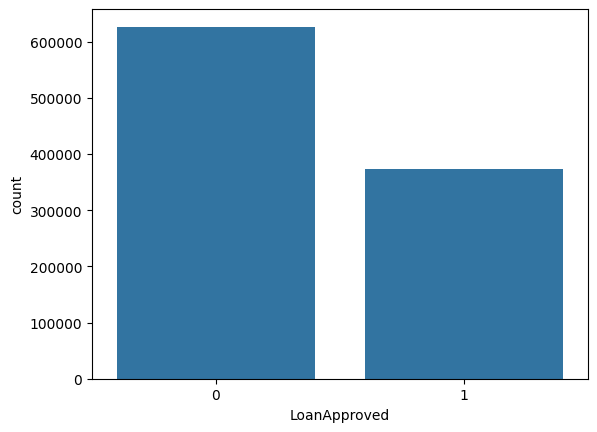

In [27]:
sns.countplot(data=df, x = "LoanApproved")
plt.xticks(rotation = 0)
plt.show()

In [28]:
#Since there is the imbalance in the 2 categories of the desired output feature we have to do upsampling.

In [29]:
### Upsampling:

In [30]:
df_minority = df[df["LoanApproved"] == 1]
df_majority = df[df["LoanApproved"] == 0]

In [31]:
from sklearn.utils import resample

In [32]:
df_minority_upsampled = resample(df_minority, replace = True, ### sampling with replacement.
         n_samples = len(df_majority),
         random_state = 42
         )

In [33]:
df_minority_upsampled.shape

(626831, 51)

In [34]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [35]:
df_upsampled.shape

(1253662, 51)

In [36]:
df = df_upsampled

In [37]:
df

,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,EmploymentStatus,MaritalStatus,NumberOfDependents,EducationLevel,HomeOwnershipStatus,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
0,402,63295,18830,13,29,Self-Employed,Widowed,2,Doctorate,Other,...,24,378,3741,40058,977,412,399,136,124,0
1,735,55936,23729,1,42,Self-Employed,Divorced,3,Master,Own,...,10,575,4115,16745,695,206,898,252,131,0
2,570,62547,19660,7,54,Self-Employed,Single,3,Doctorate,Mortgage,...,16,691,4105,23273,627,266,392,73,36,0
3,406,46129,21674,23,25,Self-Employed,Divorced,3,High School,Other,...,6,452,4559,42163,397,307,250,378,-32,0
4,371,57725,12189,26,42,Employed,Widowed,4,Master,Own,...,2,690,7856,30087,723,315,114,88,68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543907,602,72688,20728,27,54,Self-Employed,Single,2,Master,Rent,...,20,497,7659,23869,1196,364,737,143,237,1
598595,706,33040,25684,1,36,Self-Employed,Widowed,4,Doctorate,Other,...,16,66,6634,40108,1402,469,311,230,138,1
699775,796,63431,23606,6,59,Employed,Married,2,Bachelor,Rent,...,37,204,6344,31991,1517,431,341,165,43,1
136167,732,70735,12433,1,23,Self-Employed,Single,1,High School,Other,...,23,828,6884,25709,1257,107,353,373,82,1


In [40]:
### Saving the preprocessed dataset:
import pickle

df.to_pickle("preprocessed_data.pkl")

In [41]:
df.dtypes

CreditScore                     int64
AnnualIncome                    int64
LoanAmount                      int64
LoanDuration                    int64
Age                             int64
EmploymentStatus               object
MaritalStatus                  object
NumberOfDependents              int64
EducationLevel                 object
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
InterestRate                  float64
PaymentHistory                  int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
InvestmentAccountBalance        int64
RetirementAccountBalance        int64
EmergencyFundBalance            int64
TotalAssets                     int64
TotalLiabili

# Part: 2

In [97]:
# Define mappings
health_insurance_map = {"Insured": 1, "Uninsured": 0}
life_insurance_map = {"Insured": 1, "Uninsured": 0}
car_insurance_map = {"Insured": 1, "Uninsured": 0}
home_insurance_map = {"Insured": 1, "Uninsured": 0}
education_level_map = {
    'High School': 1,
    'Associate': 2,
    'Bachelor': 3,
    'Master': 4,
    'Doctorate': 5
}

In [99]:
# Apply mappings
df["HealthInsuranceStatus"] = df["HealthInsuranceStatus"].map(health_insurance_map)
df["LifeInsuranceStatus"] = df["LifeInsuranceStatus"].map(life_insurance_map)
df["CarInsuranceStatus"] = df["CarInsuranceStatus"].map(car_insurance_map)
df["HomeInsuranceStatus"] = df["HomeInsuranceStatus"].map(home_insurance_map)
df["EducationLevel"] = df["EducationLevel"].map(education_level_map) 

In [100]:
cols_to_ohe = ["LoanPurpose", "HomeOwnershipStatus", "EmploymentStatus", "MaritalStatus", "EmployerType"]
print(f"One-hot encoding columns: {cols_to_ohe}")
df = pd.get_dummies(df, columns=cols_to_ohe, drop_first=True, dtype=int)

One-hot encoding columns: ['LoanPurpose', 'HomeOwnershipStatus', 'EmploymentStatus', 'MaritalStatus', 'EmployerType']


In [101]:
# 4. Prepare X and y
print("Preparing X and y...")
X = df.drop("LoanApproved", axis=1)
y = df["LoanApproved"]

Preparing X and y...


In [102]:
# 5. Split Data
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

Splitting data...


In [103]:
# 6. Scaling
print("Scaling features...")
scaler = StandardScaler()

Scaling features...


In [104]:
cols_to_scale = X_train.columns
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=cols_to_scale)
X_test = pd.DataFrame(scaler.transform(X_test), columns=cols_to_scale)

In [105]:
### Saving the final training and testing datasets:

import pickle

X_train.to_pickle("X_train.pkl")
X_test.to_pickle("X_test.pkl")

In [106]:
new = pd.read_pickle("X_train.pkl")
list(new.dtypes)

[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('floa

In [107]:
y_train

249412    0
564566    0
109607    1
440901    1
154472    1
         ..
175777    0
413429    0
210152    0
704493    1
194276    0
Name: LoanApproved, Length: 1002929, dtype: int64

In [108]:
y_train = pd.DataFrame(y_train)
y_train

,LoanApproved
249412,0
564566,0
109607,1
440901,1
154472,1
...,...
175777,0
413429,0
210152,0
704493,1


In [109]:
y_train.to_pickle("y_train.pkl")

In [110]:
y_test = pd.DataFrame(y_test)
y_test

,LoanApproved
62892,0
678044,0
333743,1
749390,0
702867,1
...,...
711624,0
707578,0
320468,0
833601,1


In [111]:
y_test.to_pickle("y_test.pkl")